# Social Determinants in Health 
---
**Goals:** 

*   to predict heart/stroke problems, they are indicated as variables LAHCA7 and LAHCA8 respectively.
*   to identify some variables you think would be relevant and trying out some summary using pandas, for example, get the percentage of categorical variables(ethnicity, marital status), average for continuous variables(age, income, etc), or  plotting




In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
persons_data = pd.read_csv('https://raw.githubusercontent.com/MaxShalom/arise/master/personsx1.csv', delimiter = ',')
print(persons_data)

      FPX  AGE_CHG  INTV_QRT  SEX  ...  ARMFTM4P  ARMFTM5P  ARMFTM6P  ENGLANG
0       1      NaN         1    1  ...       NaN       NaN       NaN        1
1       1      NaN         1    1  ...       NaN       NaN       NaN        1
2       1      NaN         1    1  ...       NaN       NaN       NaN        1
3       1      NaN         1    2  ...       NaN       NaN       NaN        1
4       1      NaN         1    1  ...       1.0       NaN       NaN        1
...   ...      ...       ...  ...  ...       ...       ...       ...      ...
9283    1      NaN         4    1  ...       NaN       NaN       NaN        1
9284    1      NaN         4    2  ...       NaN       NaN       NaN        1
9285    1      NaN         4    2  ...       NaN       NaN       NaN        1
9286    1      NaN         4    2  ...       NaN       NaN       NaN        3
9287    1      NaN         4    2  ...       NaN       NaN       NaN        1

[9288 rows x 602 columns]


In [28]:
# Male v. Female COUNT (1= Male, 2=Female)
persons_data.groupby("SEX").count()

,FPX,AGE_CHG,INTV_QRT,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,CSTATFLG,FMX,RRP,FRRP,ORIGIN_I,HISPAN_I,RACRECI3,QCADULT,QCCHILD,R_MARITL,MRACRPI2,RACERPI2,HISCODI3,MRACBPI2,AGE_P,HHREFLG,RECTYPE,SRVY_YR,FMREFLG,FMRPFLG,PARENTS,DAD_DEGP,MOM_DEGP,SIB_DEGP,CDCMSTAT,DAD_ED,MOM_ED,FMOTHER1,FFATHER1,HHX,WTIA,...,MAFLG,CHFLG,OPFLG,OGFLG,WHONAM1,WHONAM2,NOTCOV,PRPLPLUS,PWRKBR1,COVER,COVER65O,COVER65,REGIONBR,WHYNOWKP,GEOBRTH,YRSINUS,CITIZENP,DOINGLWP,WRKLYR1,WRKHRS2,PLBORN,HEADST,HEADSTV1,ARMFVER,ARMFEV,ARMFFC,VACOV,WRKFTALL,WRKMYR,HIEMPOF,EDUC1,ERNYR_P,ARMFTM7P,ARMFTM1P,ARMFTM2P,ARMFTM3P,ARMFTM4P,ARMFTM5P,ARMFTM6P,ENGLANG
SEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4208,0,4208,2356,2020,230,145,230,4208,0,4208,4208,4208,4208,4208,4208,2,0,4208,4208,4208,4208,4208,4208,2542,4208,4208,2578,2431,4208,279,484,55,4208,0,0,4208,4208,4208,4208,...,6,0,0,0,1652,63,4208,1635,203,2356,1852,1852,4208,3225,4208,449,4208,4208,4208,975,4208,0,0,12,4208,1305,924,380,1143,918,4208,1143,216,1039,1234,1216,1035,698,368,4208
2,5080,0,5080,2581,1841,243,154,243,5080,0,5080,5080,5080,5080,5080,5080,6,0,5080,5080,5080,5080,5080,5080,3248,5080,5080,3286,3442,5080,152,309,76,5080,0,0,5080,5080,5080,5080,...,14,0,4,0,2086,75,5080,2065,203,2581,2499,2499,5080,4161,5080,669,5080,5080,5080,962,5080,0,0,3,5080,99,75,452,1095,880,5080,1095,7,90,84,80,47,22,11,5080


In [29]:
persons_data.groupby("LAHCA7").count()

,FPX,AGE_CHG,INTV_QRT,SEX,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,CSTATFLG,FMX,RRP,FRRP,ORIGIN_I,HISPAN_I,RACRECI3,QCADULT,QCCHILD,R_MARITL,MRACRPI2,RACERPI2,HISCODI3,MRACBPI2,AGE_P,HHREFLG,RECTYPE,SRVY_YR,FMREFLG,FMRPFLG,PARENTS,DAD_DEGP,MOM_DEGP,SIB_DEGP,CDCMSTAT,DAD_ED,MOM_ED,FMOTHER1,FFATHER1,HHX,...,MAFLG,CHFLG,OPFLG,OGFLG,WHONAM1,WHONAM2,NOTCOV,PRPLPLUS,PWRKBR1,COVER,COVER65O,COVER65,REGIONBR,WHYNOWKP,GEOBRTH,YRSINUS,CITIZENP,DOINGLWP,WRKLYR1,WRKHRS2,PLBORN,HEADST,HEADSTV1,ARMFVER,ARMFEV,ARMFFC,VACOV,WRKFTALL,WRKMYR,HIEMPOF,EDUC1,ERNYR_P,ARMFTM7P,ARMFTM1P,ARMFTM2P,ARMFTM3P,ARMFTM4P,ARMFTM5P,ARMFTM6P,ENGLANG
LAHCA7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1103,0,1103,1103,414,456,46,36,46,1103,0,1103,1103,1103,1103,1103,1103,0,0,1103,1103,1103,1103,1103,1103,722,1103,1103,727,700,1103,28,50,8,1103,0,0,1103,1103,1103,...,2,0,1,0,412,17,1103,405,33,414,689,689,1103,978,1103,121,1103,1103,1103,133,1103,0,0,1,1103,236,168,69,163,120,1103,163,40,187,230,235,208,146,77,1103
2,8062,0,8062,8062,4453,3351,415,259,415,8062,0,8062,8062,8062,8062,8062,8062,6,0,8062,8062,8062,8062,8062,8062,4998,8062,8062,5065,5101,8062,400,734,118,8062,0,0,8062,8062,8062,...,18,0,3,0,3275,119,8062,3244,371,4453,3609,3609,8062,6323,8062,982,8062,8062,8062,1767,8062,0,0,13,8062,1149,814,746,2037,1642,8062,2037,179,927,1071,1042,862,565,297,8062
7,53,0,53,53,32,25,4,1,4,53,0,53,53,53,53,53,53,2,0,53,53,53,53,53,53,34,53,53,35,32,53,1,3,2,53,0,0,53,53,53,...,0,0,0,0,26,1,53,26,0,32,21,21,53,37,53,2,53,53,53,15,53,0,0,0,53,8,7,5,16,15,53,16,2,6,7,8,5,4,2,53
8,17,0,17,17,12,9,1,0,1,17,0,17,17,17,17,17,17,0,0,17,17,17,17,17,17,11,17,17,11,12,17,1,3,0,17,0,0,17,17,17,...,0,0,0,0,10,1,17,10,0,12,5,5,17,8,17,1,17,17,17,9,17,0,0,0,17,2,2,3,9,9,17,9,0,2,2,2,1,0,0,17
9,53,0,53,53,26,20,7,3,7,53,0,53,53,53,53,53,53,0,0,53,53,53,53,53,53,25,53,53,26,28,53,1,3,3,53,0,0,53,53,53,...,0,0,0,0,15,0,53,15,2,26,27,27,53,40,53,12,53,53,53,13,53,0,0,1,53,9,8,9,13,12,53,13,2,7,8,9,6,5,3,53


In [30]:
persons_data[["LAHCA7", "LAHCA8"]].describe()

,LAHCA7,LAHCA8
count,9288.000000,9288.000000
mean,1.960702,2.026055
std,0.778096,0.735485
min,1.000000,1.000000
25%,2.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,9.000000,9.000000


In [31]:
persons_data["LAHCA7"].value_counts()

2    8062
1    1103
7      53
9      53
8      17
Name: LAHCA7, dtype: int64

In [32]:
p=persons_data.groupby(["LAHCA7", "R_MARITL"]).size().reset_index(name="Count")
print(p)

    LAHCA7  R_MARITL  Count
0        1         1    456
1        1         2     11
2        1         4    238
3        1         5    198
4        1         6     35
5        1         7    118
6        1         8     46
7        1         9      1
8        2         1   3351
9        2         2    100
10       2         4   1273
11       2         5   1213
12       2         6    202
13       2         7   1490
14       2         8    415
15       2         9     18
16       7         1     25
17       7         2      1
18       7         4      5
19       7         5      7
20       7         6      1
21       7         7      8
22       7         8      4
23       7         9      2
24       8         1      9
25       8         2      1
26       8         4      3
27       8         7      3
28       8         8      1
29       9         1     20
30       9         2      1
31       9         4      4
32       9         5      7
33       9         6      4
34       9         7

In [33]:
pd.crosstab(persons_data.LAHCA7, persons_data.R_MARITL).apply(lambda r: r/r.sum(), axis=1)

R_MARITL,1,2,4,5,6,7,8,9
LAHCA7,,,,,,,,
1,0.413418,0.009973,0.215775,0.179510,0.031732,0.106981,0.041704,0.000907
2,0.415654,0.012404,0.157901,0.150459,0.025056,0.184818,0.051476,0.002233
7,0.471698,0.018868,0.094340,0.132075,0.018868,0.150943,0.075472,0.037736
8,0.529412,0.058824,0.176471,0.000000,0.000000,0.176471,0.058824,0.000000
9,0.377358,0.018868,0.075472,0.132075,0.075472,0.188679,0.132075,0.000000


In [34]:
# Calculated mean by different groups##
persons_data.groupby('LAHCA7')['AGE_P'].mean()

LAHCA7
1    67.620127
2    60.266807
7    57.905660
8    59.705882
9    62.056604
Name: AGE_P, dtype: float64

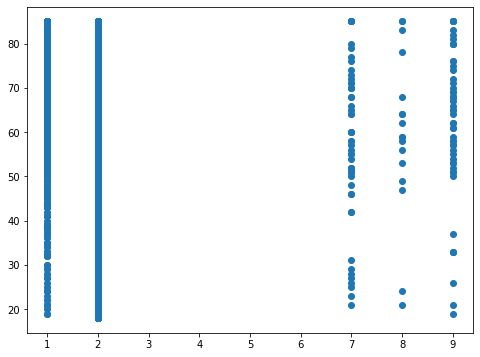

In [35]:
# Scatterplot by group and compare differences
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(persons_data.LAHCA7, persons_data.AGE_P, cmap='tab20b')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4282c81cf8>,
      dtype=object)

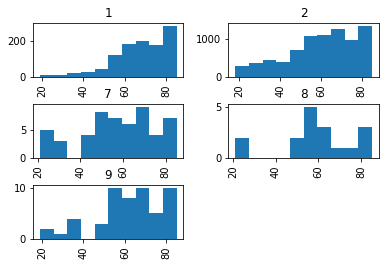

In [36]:
persons_data['AGE_P'].hist(by=persons_data['LAHCA7'])